# Part 3

### Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expected_return = np.matrix([[0.064], [0.037], [0.085]])
cov_matrix = np.matrix([[0.007870, 0.003085, 0.000989],
                       [0.003085, 0.003696, 0.000129],
                       [0.000989, 0.000129, 0.009587]])
# mu is the target return
mu = np.arange(0.04, 0.061, 0.0001)
# capital is the total budget
capital = 10

# Print mu
print("mu value that is between 0.04 and 0.06:\n",mu)

mu value that is between 0.04 and 0.06:
 [0.04   0.0401 0.0402 0.0403 0.0404 0.0405 0.0406 0.0407 0.0408 0.0409
 0.041  0.0411 0.0412 0.0413 0.0414 0.0415 0.0416 0.0417 0.0418 0.0419
 0.042  0.0421 0.0422 0.0423 0.0424 0.0425 0.0426 0.0427 0.0428 0.0429
 0.043  0.0431 0.0432 0.0433 0.0434 0.0435 0.0436 0.0437 0.0438 0.0439
 0.044  0.0441 0.0442 0.0443 0.0444 0.0445 0.0446 0.0447 0.0448 0.0449
 0.045  0.0451 0.0452 0.0453 0.0454 0.0455 0.0456 0.0457 0.0458 0.0459
 0.046  0.0461 0.0462 0.0463 0.0464 0.0465 0.0466 0.0467 0.0468 0.0469
 0.047  0.0471 0.0472 0.0473 0.0474 0.0475 0.0476 0.0477 0.0478 0.0479
 0.048  0.0481 0.0482 0.0483 0.0484 0.0485 0.0486 0.0487 0.0488 0.0489
 0.049  0.0491 0.0492 0.0493 0.0494 0.0495 0.0496 0.0497 0.0498 0.0499
 0.05   0.0501 0.0502 0.0503 0.0504 0.0505 0.0506 0.0507 0.0508 0.0509
 0.051  0.0511 0.0512 0.0513 0.0514 0.0515 0.0516 0.0517 0.0518 0.0519
 0.052  0.0521 0.0522 0.0523 0.0524 0.0525 0.0526 0.0527 0.0528 0.0529
 0.053  0.0531 0.0532 0.0533 0.0534 

In [3]:
def calc_portfolio(mu, expected_return, cov_matrix, capital):

    # calculate asset allocation
    ones = np.matrix([[1] for item in expected_return])
    x1 = expected_return.T * cov_matrix.I * ones
    x2 = expected_return.T * cov_matrix.I * expected_return
    x3 = ones.T * cov_matrix.I * ones
    portfolio_details = {}
    portfolio_details['mu'] = []
    portfolio_details['w1'] = []
    portfolio_details['p1'] = []
    portfolio_details['w2'] = []
    portfolio_details['p2'] = []
    portfolio_details['w3'] = []
    portfolio_details['p3'] = []
    portfolio_details['tot_var'] = []
    portfolio_details['std_dev'] = []
    
    # Update mu value
    for target_return in mu:
        lambda1 = (x3 * target_return - x1) / (x2 * x3 - np.square(x1))
        lambda2 = (x2 - x1 * target_return) / (x2 * x3 - np.square(x1))
        weights = cov_matrix.I * (lambda1[0, 0] * expected_return + lambda2[0, 0] * ones)

        # add results to dictionary object
        portfolio_details['mu'].append(target_return)
        
        # capture all weights and investment amounts
        for i, val in enumerate(weights):
            
            if i == 0:  # In the Product1, add values in
                portfolio_details['w1'].append(val[0,0])
                portfolio_details['p1'].append(round(val[0, 0] * capital, 2))
                
            elif i == 1: # In the Product2, add values in
                portfolio_details['w2'].append(val[0,0])
                portfolio_details['p2'].append(round(val[0, 0] * capital, 2))
                
            elif i == 2: # In the Product3, add values in
                portfolio_details['w3'].append(val[0,0])
                portfolio_details['p3'].append(round(val[0, 0] * capital, 2))        
    
        # calculate portfolio variance and standard deviation
        portfolio_details['tot_var'].append((weights.T * cov_matrix * weights)[0, 0])
        portfolio_details['std_dev'].append(np.sqrt((weights.T * cov_matrix * weights)[0, 0]))

    return portfolio_details

Text(0, 0.5, 'Allocated Capital Per Million')

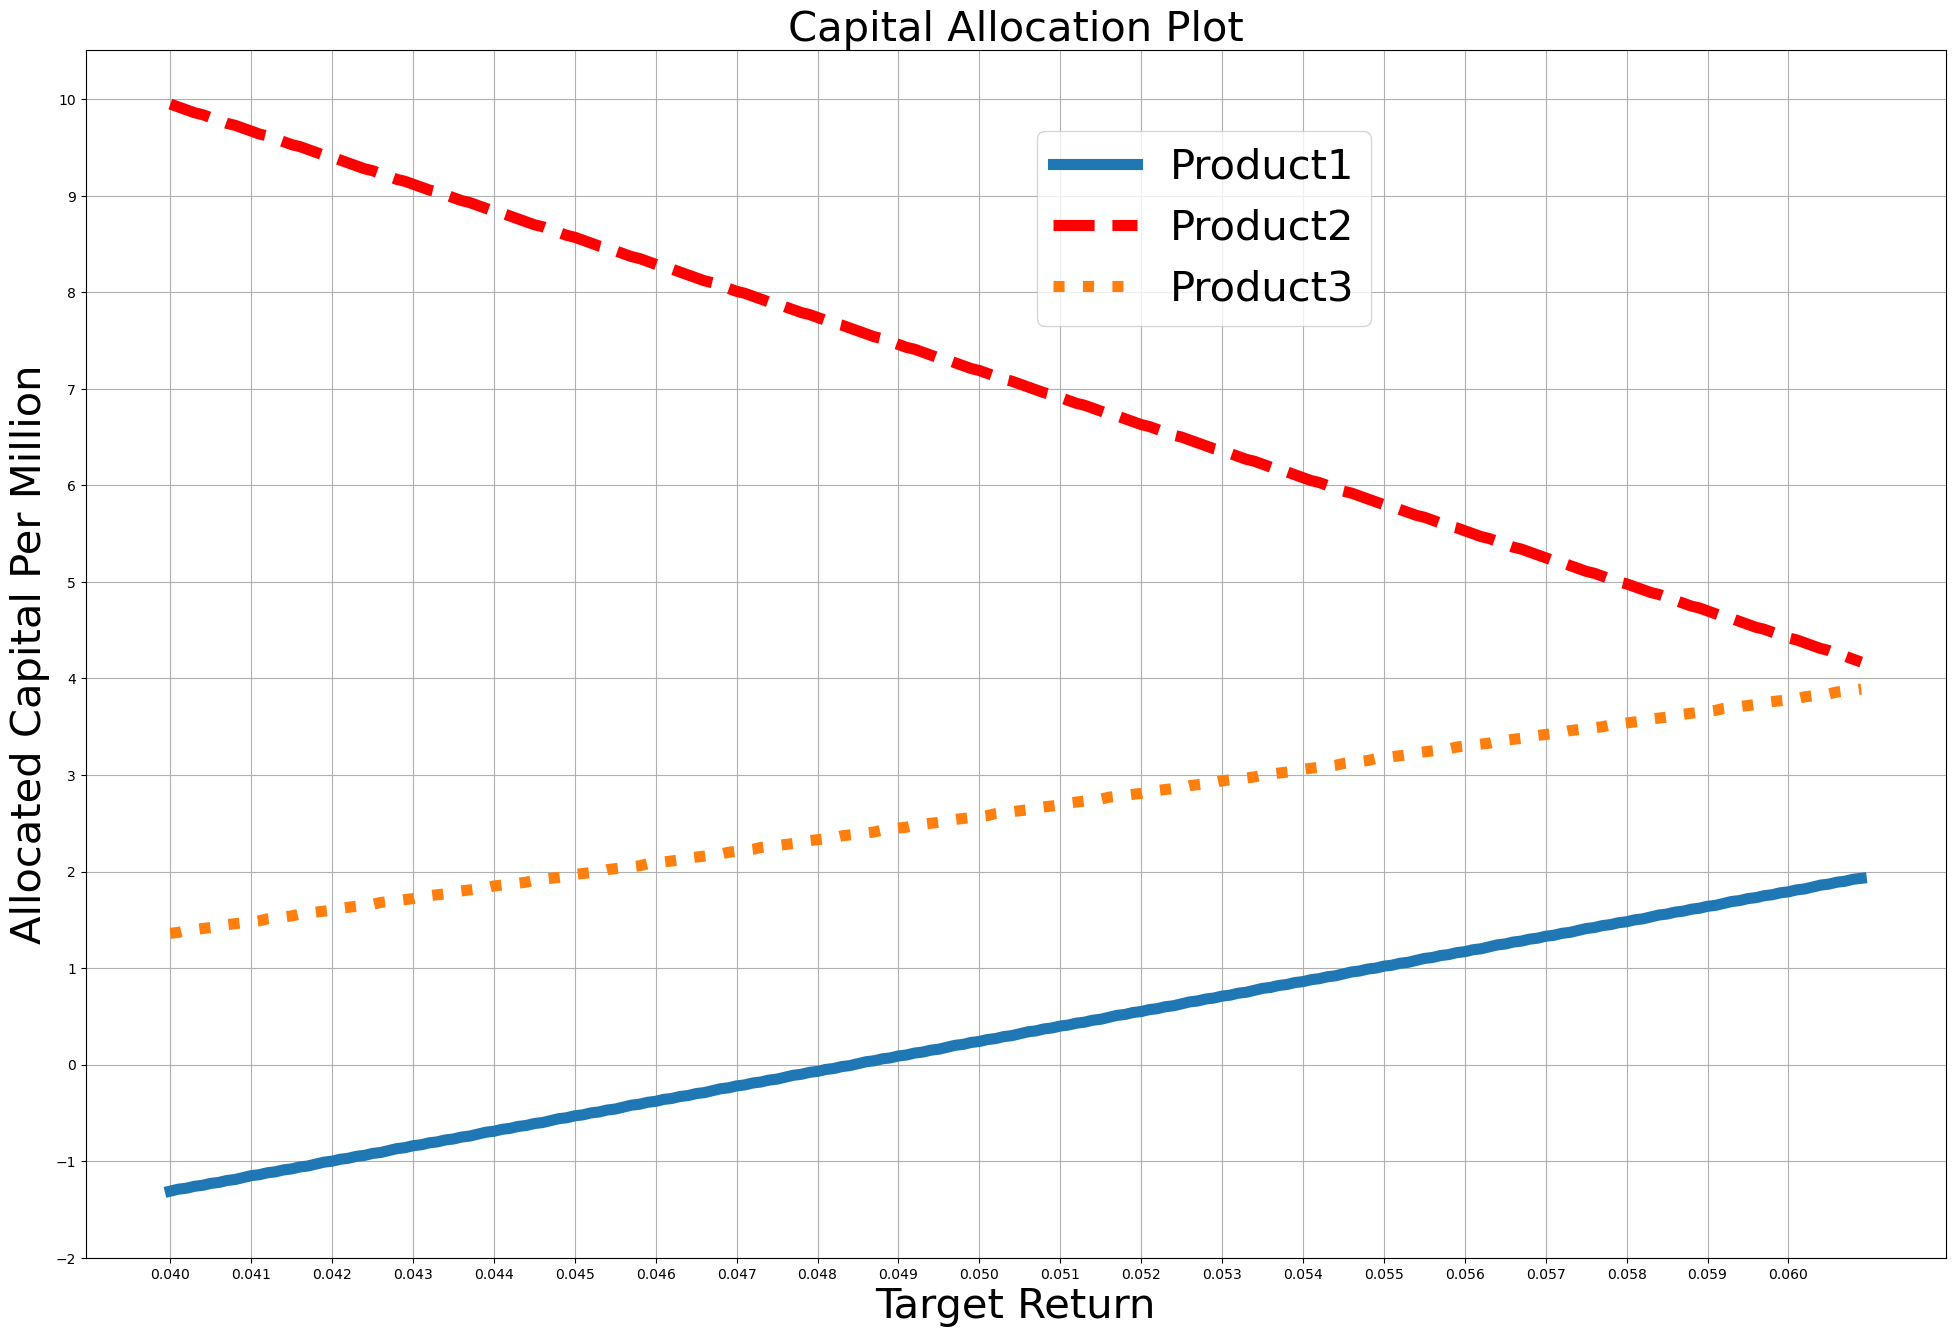

In [4]:
# Plot the graph
temp = calc_portfolio(mu, expected_return, cov_matrix, capital)
plt.figure(figsize=(24,16), dpi= 100)

# Plot three products
plt.plot(temp['mu'],temp['p1'],label="Product1",linewidth=8)
plt.plot(temp['mu'],temp['p2'],'r--',label="Product2",linewidth=8)
plt.plot(temp['mu'],temp['p3'],':',label="Product3",linewidth=8)

# Add legend to the graph
plt.legend(bbox_to_anchor=(0.50, 0.95),fontsize=30)

# Add title to the plot
plt.title('Capital Allocation Plot',fontsize=30)

# Change the value for x-axis and y-axis
plt.xticks(np.arange(0.04,0.061,0.001))
plt.yticks(np.arange(-2,11,1))
plt.grid(axis='both')

# Add captions 
plt.xlabel('Target Return', fontsize = 30)
plt.ylabel('Allocated Capital Per Million', fontsize = 30)

### Question 2

In [5]:
# Print new_mu
new_mu = np. arange(0.04, 0.071, 0.0001)
print("new mu value that is between 0.04 and 0.07:\n",new_mu)

new mu value that is between 0.04 and 0.07:
 [0.04   0.0401 0.0402 0.0403 0.0404 0.0405 0.0406 0.0407 0.0408 0.0409
 0.041  0.0411 0.0412 0.0413 0.0414 0.0415 0.0416 0.0417 0.0418 0.0419
 0.042  0.0421 0.0422 0.0423 0.0424 0.0425 0.0426 0.0427 0.0428 0.0429
 0.043  0.0431 0.0432 0.0433 0.0434 0.0435 0.0436 0.0437 0.0438 0.0439
 0.044  0.0441 0.0442 0.0443 0.0444 0.0445 0.0446 0.0447 0.0448 0.0449
 0.045  0.0451 0.0452 0.0453 0.0454 0.0455 0.0456 0.0457 0.0458 0.0459
 0.046  0.0461 0.0462 0.0463 0.0464 0.0465 0.0466 0.0467 0.0468 0.0469
 0.047  0.0471 0.0472 0.0473 0.0474 0.0475 0.0476 0.0477 0.0478 0.0479
 0.048  0.0481 0.0482 0.0483 0.0484 0.0485 0.0486 0.0487 0.0488 0.0489
 0.049  0.0491 0.0492 0.0493 0.0494 0.0495 0.0496 0.0497 0.0498 0.0499
 0.05   0.0501 0.0502 0.0503 0.0504 0.0505 0.0506 0.0507 0.0508 0.0509
 0.051  0.0511 0.0512 0.0513 0.0514 0.0515 0.0516 0.0517 0.0518 0.0519
 0.052  0.0521 0.0522 0.0523 0.0524 0.0525 0.0526 0.0527 0.0528 0.0529
 0.053  0.0531 0.0532 0.0533 0.0

Text(0, 0.5, 'Standard Deviation')

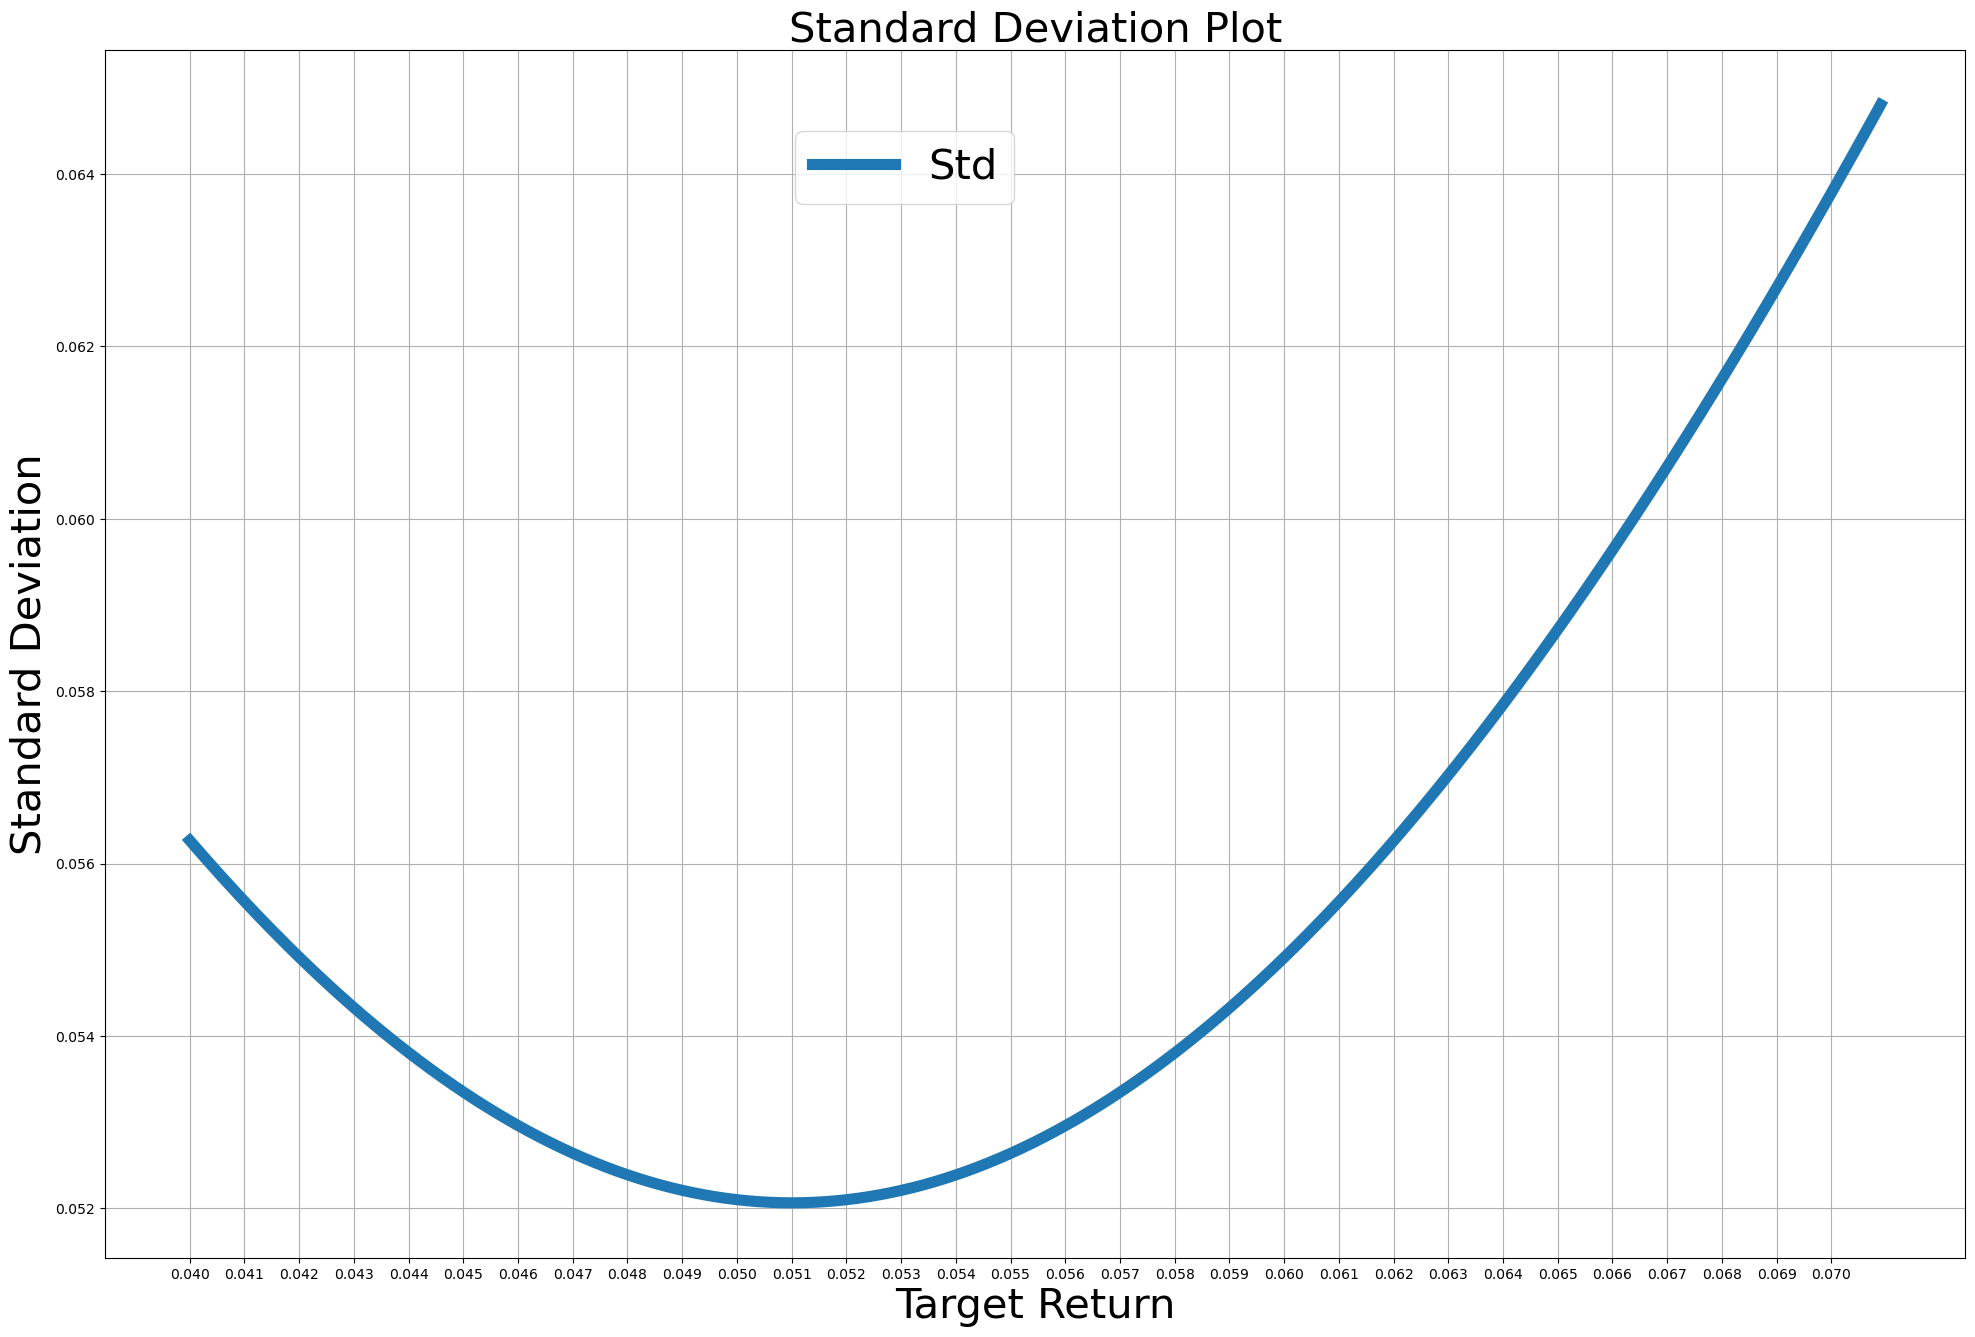

In [6]:
# Plot the graph
temp2 = calc_portfolio(new_mu, expected_return, cov_matrix, capital)

plt.figure(figsize=(24,16), dpi= 100)
plt.plot(temp2['mu'],temp2['std_dev'],label="Std",linewidth=8)

# Add legend to the graph
plt.legend(bbox_to_anchor=(0.50, 0.95),fontsize=30)

# Add title to the plot
plt.title('Standard Deviation Plot',fontsize=30)

# Change the value for x-axis
plt.xticks(np.arange(0.04,0.071,0.001))
plt.grid(axis='both')

# Add captions 
plt.xlabel('Target Return', fontsize = 30)
plt.ylabel('Standard Deviation', fontsize = 30)